# kmeans - unsupervised and  supervised for logistic regression together 

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler, LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv')

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
127,6.1,3.0,4.9,1.8,Iris-virginica
24,4.8,3.4,1.9,0.2,Iris-setosa
45,4.8,3.0,1.4,0.3,Iris-setosa
71,6.1,2.8,4.0,1.3,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica


In [6]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

- sepal  length in cm
- sepal width in cm
- petal length in cm
- petal width in cm
- species it's class and it's the target column


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

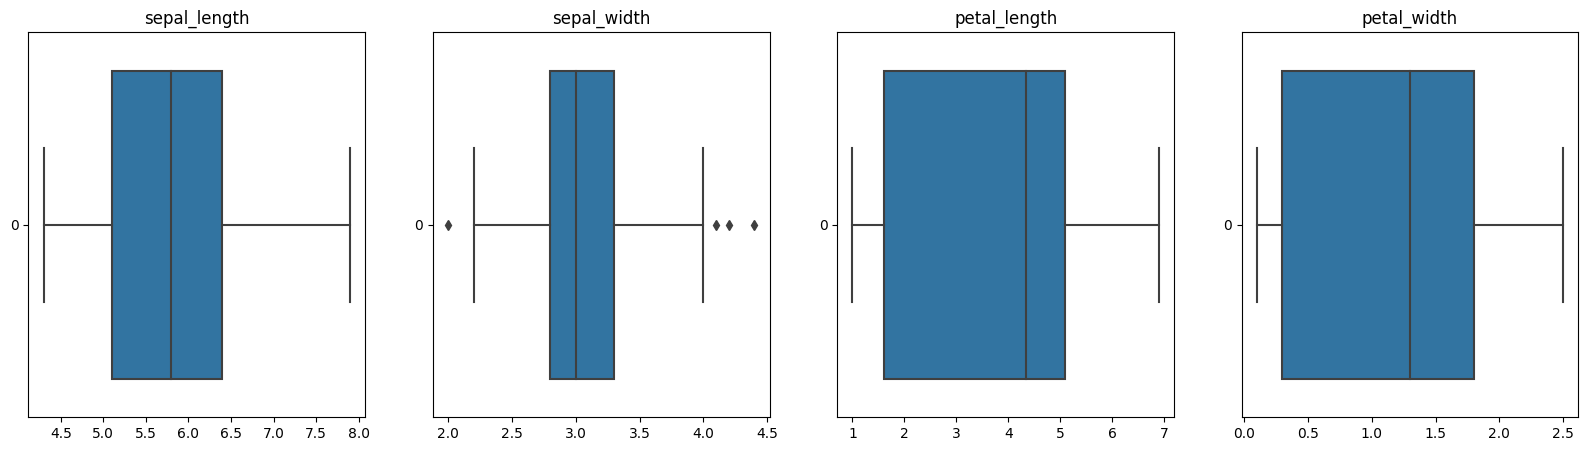

In [9]:
l = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.figure(figsize=(20,5))

for i , j in enumerate(l):
    plt.subplot(1,4,i+1)
    sns.boxplot(df[j], orient='h')
    plt.title(j)

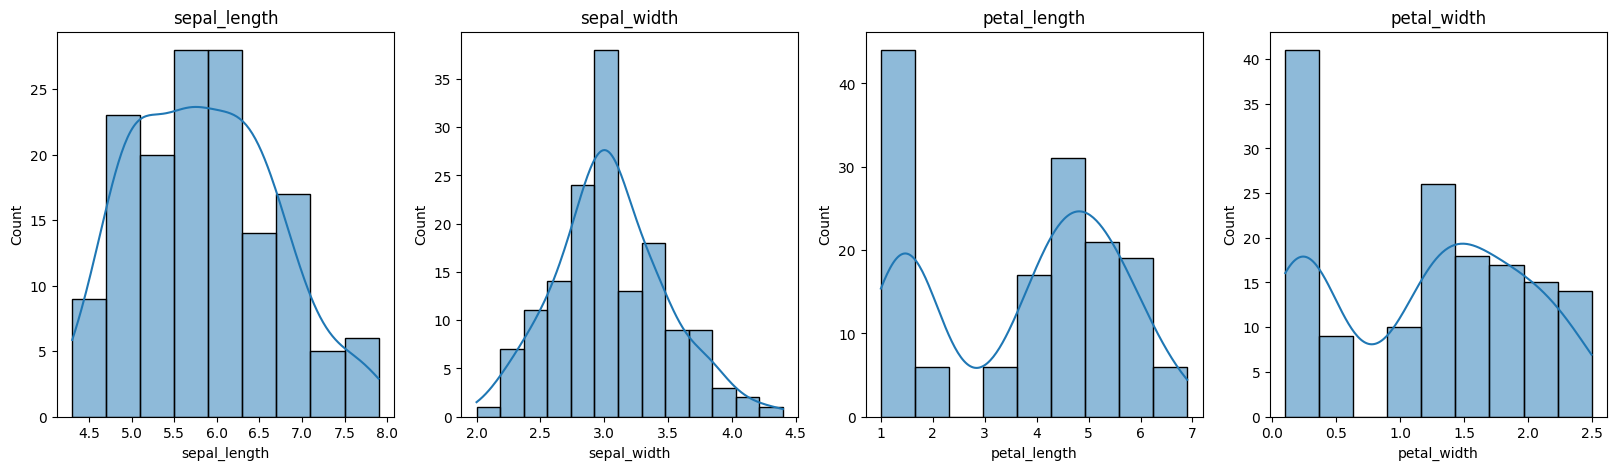

In [10]:
l = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.figure(figsize=(20,5))

for i , j in enumerate(l):
    plt.subplot(1,4,i+1)
    sns.histplot(df, x=j, kde=True)
    plt.title(j)

In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
df[l].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

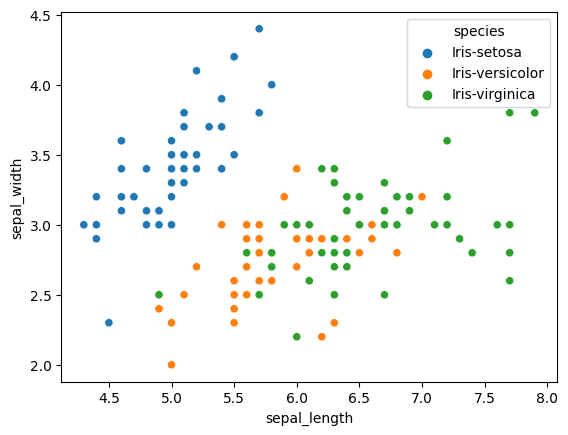

In [13]:
sns.scatterplot(df, x='sepal_length', y='sepal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

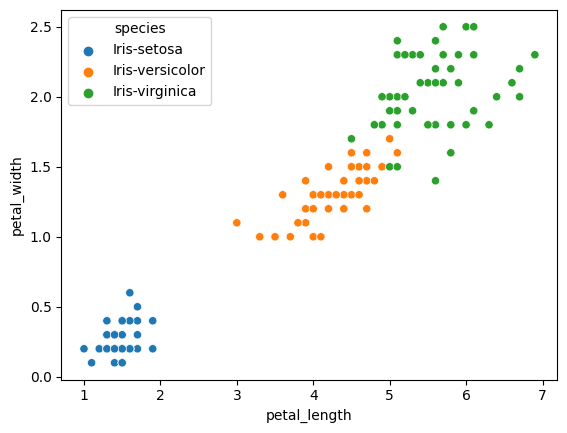

In [14]:
sns.scatterplot(df, x='petal_length', y='petal_width', hue='species')

In [15]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [16]:

label = LabelEncoder()
stan= StandardScaler()

In [17]:
#df[l] = stan.fit_transform(df[l])

In [18]:
# df['species']  = label.fit_transform(df['species'])

In [19]:
x = df.drop(columns='species')
y = df['species']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=10)

In [21]:
lor = LogisticRegression()

In [22]:
lor.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pred = lor.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [24]:
lor.score(x_test,y_test)

1.0

In [25]:
accuracy_score(y_test, y_pred)

1.0

In [26]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

# check the result 


sepall_length = float((input("this is sepal_length")))
sepal_width = float((input("this is sepal_width ")))
petal_length = float((input("this is petal_lenth")))
petal_width = float((input("ths is petal_width")))

prediction = [[sepal_width, sepal_width, petal_length, petal_width]]

if lor.predict(prediction) ==[[0]]:
    print("Iris-setosa")
elif   lor.predict(prediction) ==[[1]]:
    print("Iris-versicolor  ")    
else:
    print("Iris-virginica")    

In [27]:
import pickle
from pyexpat import model

filename = 'svemodel.sav'
pickle.dump(lor, open(filename, 'wb'))

In [28]:
loea = pickle.load(open(filename, 'rb'))

In [29]:
loea.predict([[6.0,2.1,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

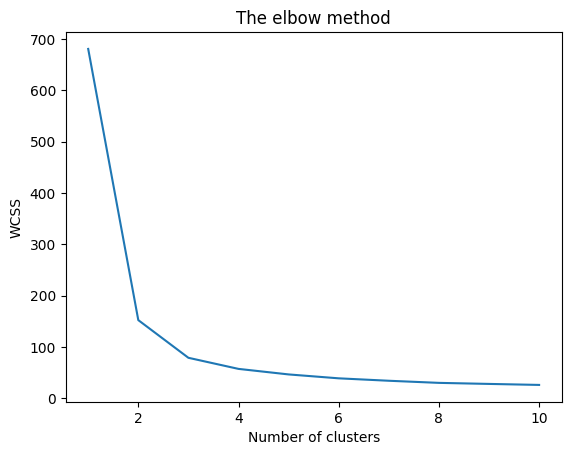

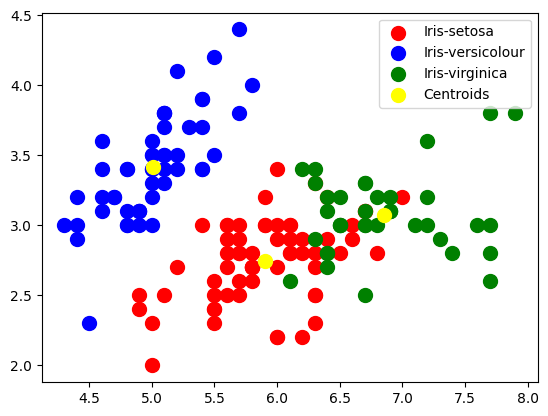

In [32]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()